In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
df = pd.read_csv("faang_stock_prices.csv")
df

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14959,2026-01-22,AMZN,234.050003,235.720001,230.899994,234.339996,31913300,236.171426,236.013333,236.263937,235.039321,53.529872,1.224615,2.202436,248.520707,224.264292,0.013099,0.017721,239.160004
14960,2026-01-22,GOOGL,334.450012,335.149994,328.750000,330.540009,26253600,330.787144,321.977620,326.886086,320.764595,67.582193,6.121491,6.383337,339.589684,305.585319,0.006578,0.014879,327.929993
14961,2026-01-22,META,629.349976,660.570007,626.549988,647.630005,21394700,621.767151,645.427618,632.259363,640.510804,45.687381,-8.251442,-5.985550,684.649099,604.598899,0.056562,0.028988,658.760010
14962,2026-01-22,MSFT,447.619995,452.839996,444.700012,451.140015,25349400,456.619999,473.541905,462.516201,471.646111,28.776809,-9.129910,-6.416445,500.741510,445.204489,0.015829,0.014832,465.950012


# Line plots

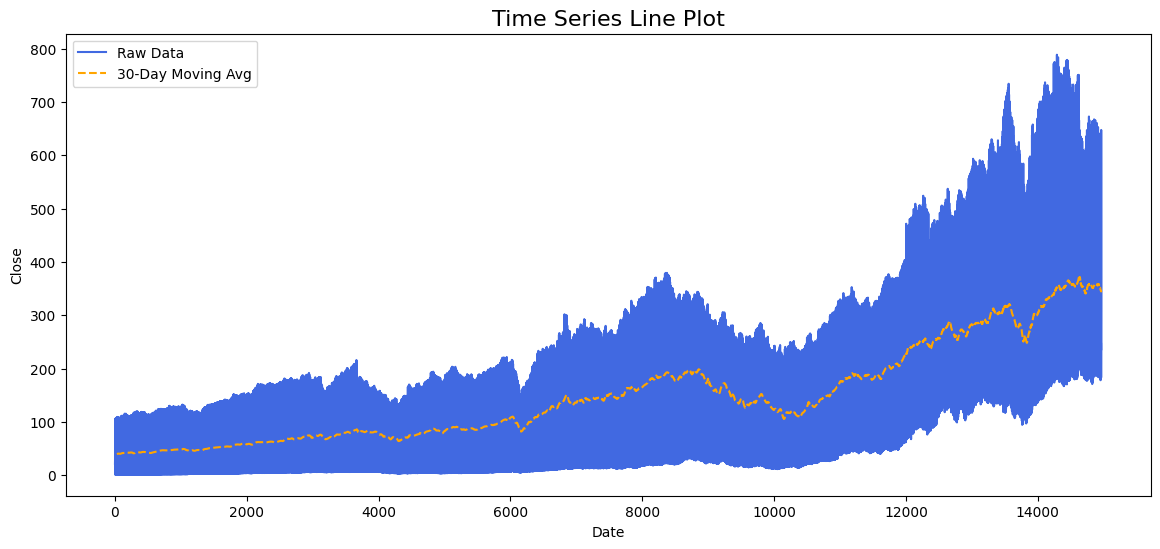

In [ ]:
def plot_line(df, column, title="Time Series Line Plot of the Close"):
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[column], label='Raw Data', color='royalblue', linewidth=1.5)
    plt.plot(df.index, df[column].rolling(window=30).mean(),
             label='30-Day Moving Avg', color='orange', linestyle='--')
    plt.title(title, fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.show()
plot_line(df, 'Close')

# Seasonal decomposition

- this time series shows increasing variability as the trend increases, this means we shall use a multiplicative decomposition model

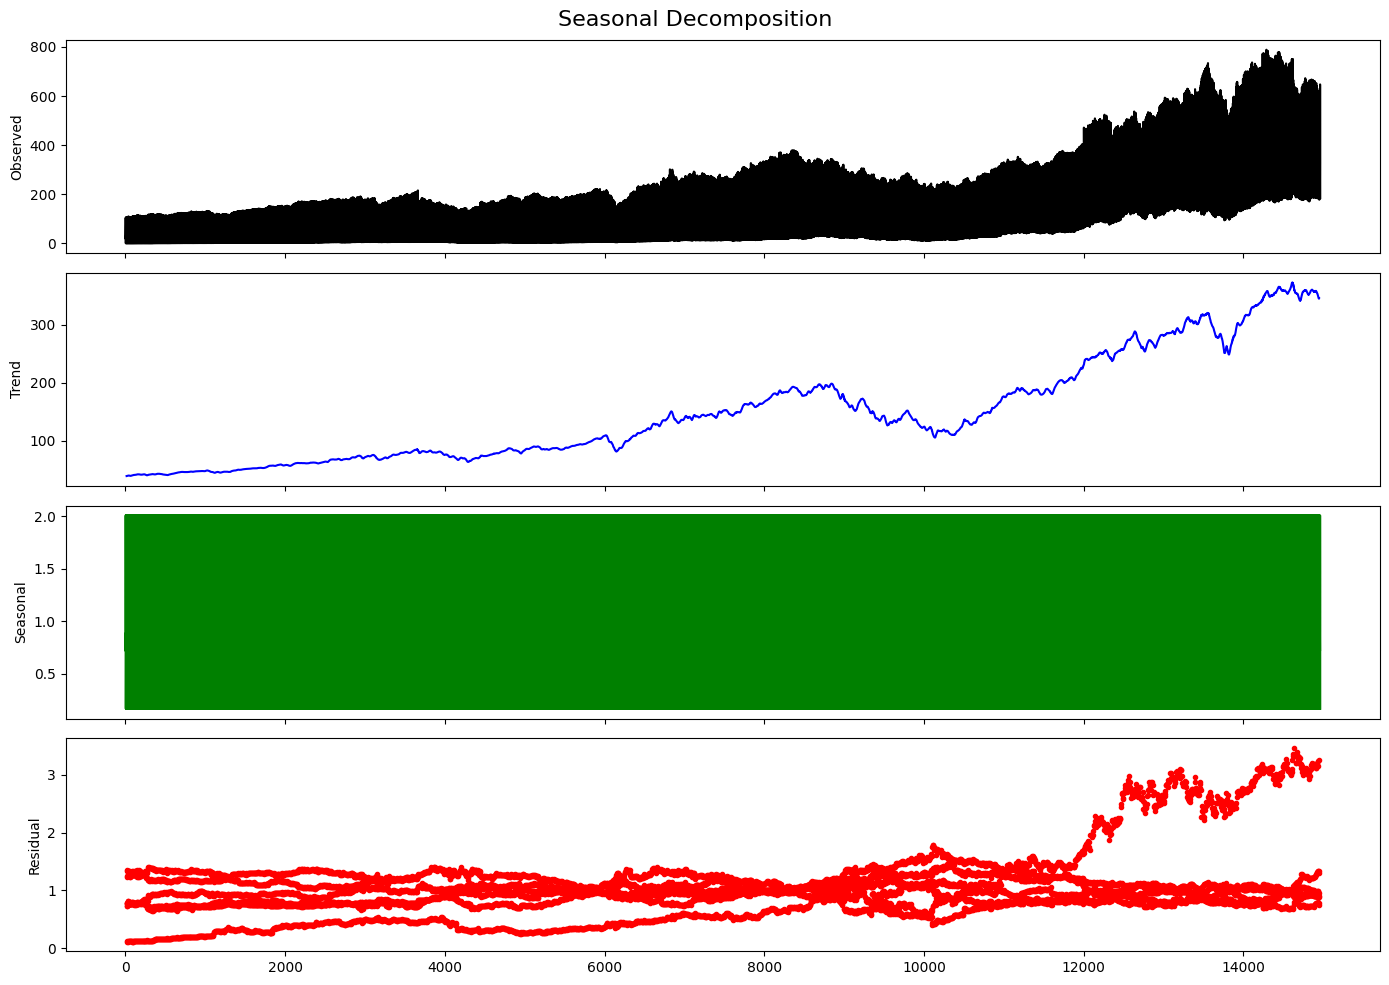

In [9]:
def plot_decomposition(df,column,period=30):
    result = seasonal_decompose(df['Close'],model ='multiplicative',period = period)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
    result.observed.plot(ax=ax1, color='black')
    ax1.set_ylabel('Observed')
    result.trend.plot(ax=ax2, color='blue')
    ax2.set_ylabel('Trend')
    result.seasonal.plot(ax=ax3, color='green')
    ax3.set_ylabel('Seasonal')
    result.resid.plot(ax=ax4, color='red', linestyle='None', marker='.')
    ax4.set_ylabel('Residual')
    plt.suptitle('Seasonal Decomposition', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_decomposition(df, 'Close')

- Observed: there is an upward movement with the fluctuations widening over time hence both the mean and variance change over time. This is an indicator of non-stationarity
- Trend: there is a general upward trend
- Seasonal: There is no clear seasonality in the data meaning that the closing prices do not have any clear repeating pattern
- Residual: This shows the noise in the data and the random variations that possibly cause the variance and mean to continuously change over time.

# Autocorrelation (ACF) plot

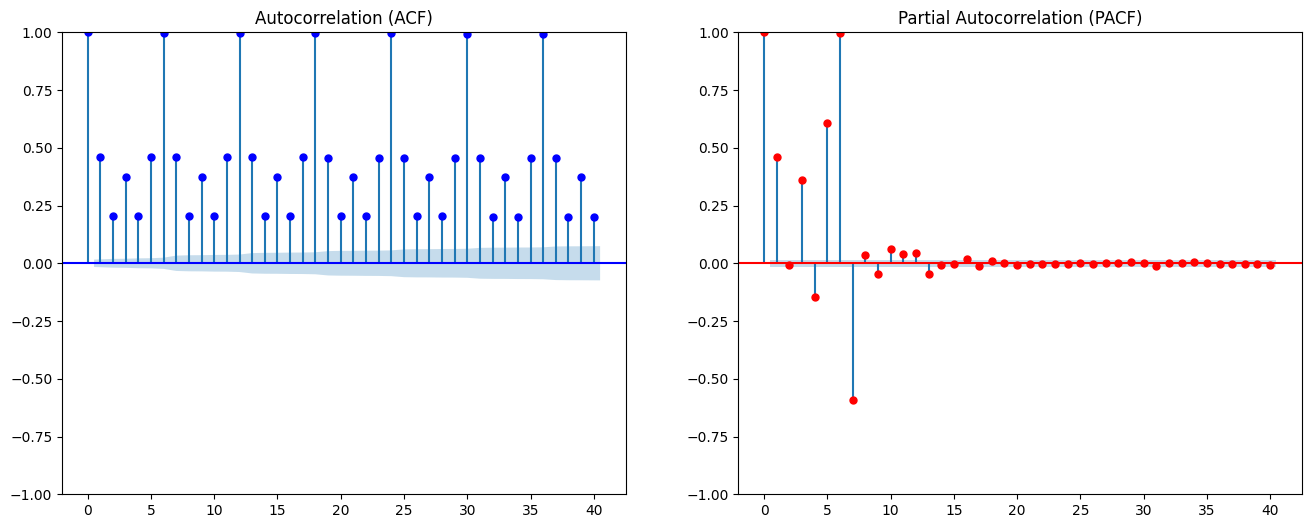

In [13]:
def plot_correlograms(df, column, lags=40):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    #ACF
    plot_acf(df[column], lags=lags, ax=ax1, color='blue')
    ax1.set_title('Autocorrelation (ACF)')

    #PACF
    plot_pacf(df[column], lags=lags, ax=ax2, color='red', method='ywm')
    ax2.set_title('Partial Autocorrelation (PACF)')
    plt.show()

plot_correlograms(df, 'Close')

- ACF: There is a strong positive autocorrelation across many lags hence the closing prices are highly dependent on the past values.
- PACF: Only few previous closing stock prices directly influence the present.

# Seasonal Heatmap

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  object 
 1   Ticker           14964 non-null  object 
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7

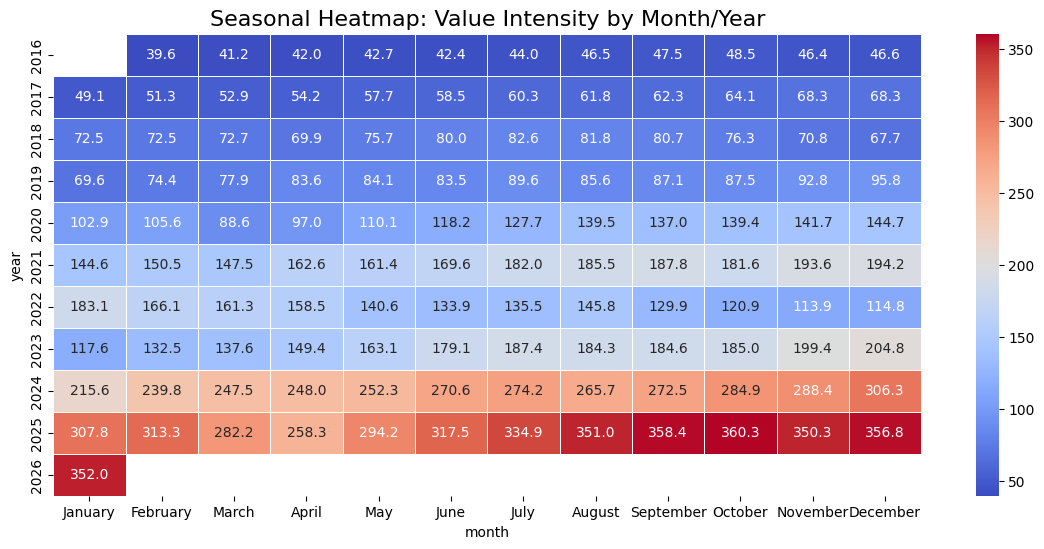

In [17]:
def plot_heatmap(df, column):
    df_heat = df.copy()
    #converting date to a datetime object
    df_heat['Date'] = pd.to_datetime(df_heat['Date'])
    df_heat['year'] = df_heat['Date'].dt.year
    df_heat['month'] = df_heat['Date'].dt.month_name()

    # Pivot table
    pivot_table = df_heat.pivot_table(index='year', columns='month', values=column,aggfunc='mean')

    # Sort months correctly
    months_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
    pivot_table = pivot_table.reindex(columns=months_order)

    plt.figure(figsize=(14, 6))
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
    plt.title('Seasonal Heatmap: Value Intensity by Month/Year', fontsize=16)
    plt.show()

plot_heatmap(df,'Close')


# Distribution Plots

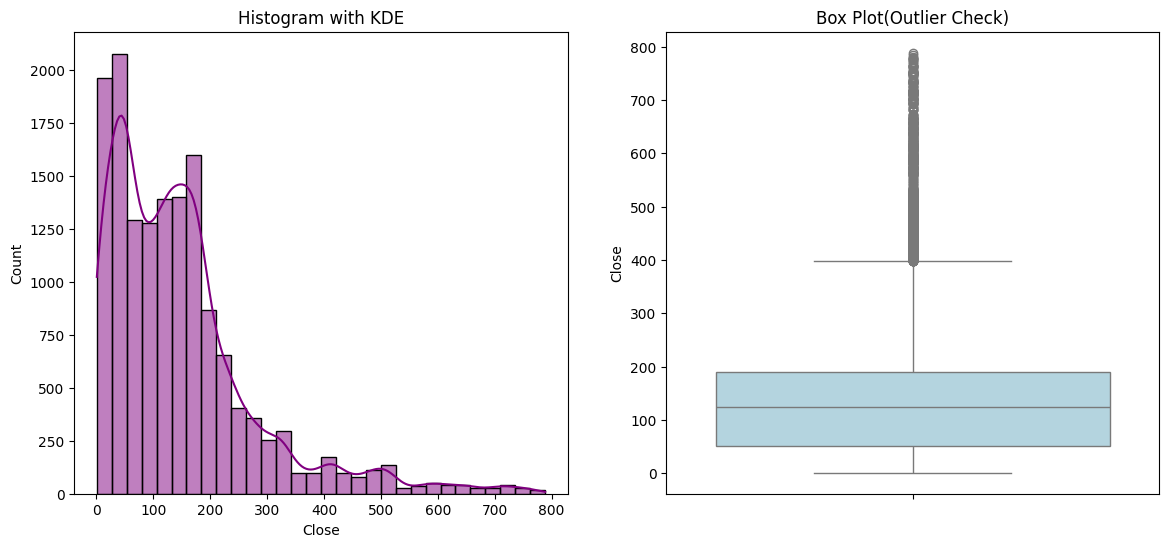

In [15]:
def plot_distribution(df,column):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
    #Histogram
    sns.histplot(df[column],kde=True,ax=ax1,color='purple',bins=30)
    ax1.set_title('Histogram with KDE')

    # Boxplot
    sns.boxplot(y=df[column],ax=ax2,color='lightblue')
    ax2.set_title('Box Plot(Outlier Check)')

    plt.show()
plot_distribution(df,'Close')